In [2]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.6 MB/s eta 0:00:00


In [3]:
pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 23.9 MB/s eta 0:00:00


In [6]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMT

def bernstein_vazirani(oracle, n):
    # number of qubits = n (input) + 1 (output)
    qc = QuantumCircuit(n+1, n)

    # flip the control qubit
    qc.x(n)

    # hadamard all qubits
    qc.h(range(n+1))

    # oracle
    qc.append(oracle, range(n+1))

    # hadamard all except control
    qc.h(range(n))

    qc.measure(range(n), range(n))

    return qc

s = "1010"

def oracle(s):
    n = len(s)
    oracle_circuit = QuantumCircuit(n + 1)
    for i, bit in enumerate(reversed(s)): # reversed because qiskit orders qubits from right to left
        if bit == '1':
            oracle_circuit.cx(i, n)
    return oracle_circuit.to_gate(label='Uf')

# get circuit
qc = bernstein_vazirani(oracle(s), len(s))
qc.draw()

┌───┐     ┌─────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0    ├┤ H ├┤M├─────────
     ├───┤     │     │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1    ├┤ H ├─╫─┤M├──────
     ├───┤     │     │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 Uf ├┤ H ├─╫──╫─┤M├───
     ├───┤     │     │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3    ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│     │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4    ├──────╫──╫──╫──╫─
     └───┘└───┘└─────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════╩══╩══╩══╩═
                            0  1  2  3

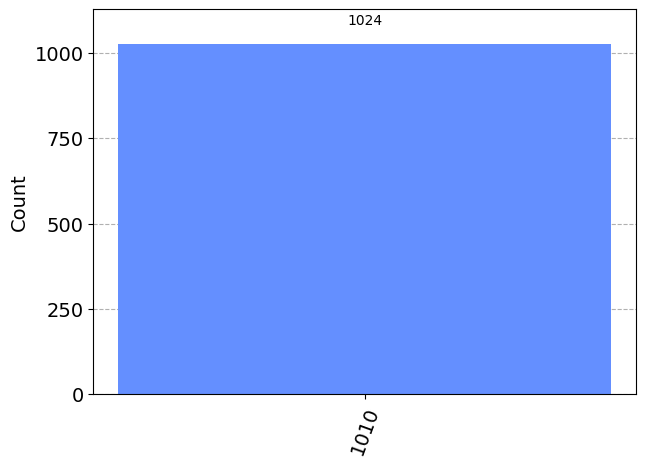

In [7]:
# Simulator (no noise)
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts = result.get_counts(qc)
plot_histogram(counts)

{'1110': 27, '1111': 3, '1000': 9, '0000': 1, '0010': 16, '0011': 1, '1011': 23, '1010': 944}


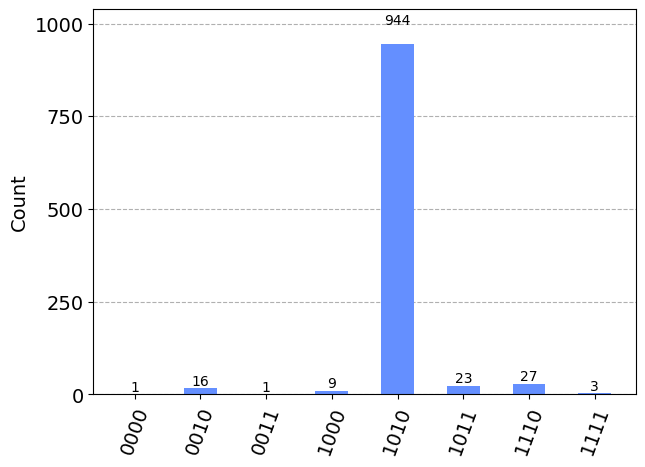

In [8]:
from qiskit.providers.fake_provider import FakeOslo
from qiskit_aer.noise import NoiseModel
backend = FakeOslo()
noise_model = NoiseModel.from_backend(backend)
coupling_map = backend.coupling_map
basis_gates = noise_model.basis_gates
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator,noise_model=noise_model, coupling_map=coupling_map, basis_gates=basis_gates).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)